In [1]:
import pandas as pd
marathon_2015_2017 = pd.read_csv("marathon_2015_2017.csv")
pd.options.display.max_columns = 25
marathon_2015_2017.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,3842,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,3841,4567,5519,6479,7362,298,7788,2,2,2,2015


In [2]:
# 현지인들만 골라낸 데이터 필터링
USA_runner = marathon_2015_2017[marathon_2015_2017['Country'] == 'USA']
USA_runner.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
6,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885,1785,2720,3643,3843,4565,5519,6486,7445,301,7880,7,7,7,2015
7,"Keflezighi, Meb",39,M,San Diego,CA,USA,884,1784,2699,3630,3842,4567,5519,6479,7498,304,7962,8,8,8,2015


In [3]:
USA_runner.shape

(64474, 21)

#### 막대차트(BarChart)
* 파이썬 외부 라이프러리중 차트를 지원하는 모듈 :  matplotlib.pyplot
* 파이썬 차트에 얹혀서 사용되는 업그레이트 차트 모듈 : seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


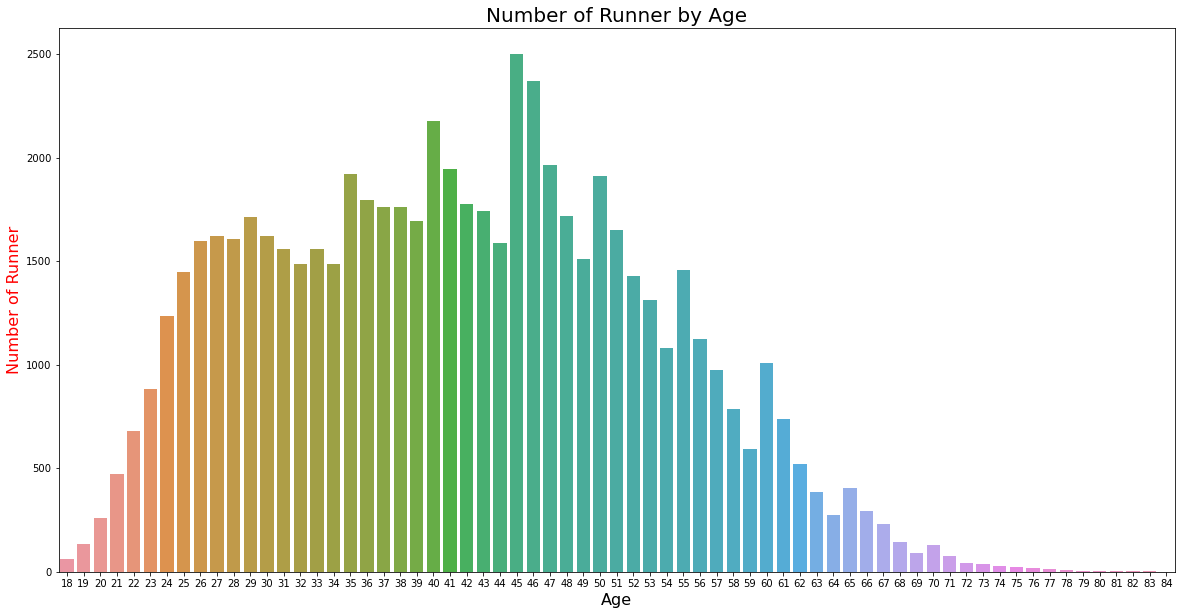

In [6]:
# 미국 참가자의 연력별 참석 인원수
import matplotlib.pyplot as plt
import seaborn as sns
# 차트의 크기를 설정합니다 - 화면에 위치하는 차트의 크기를 표시하지만
# 크기보단 비율로 사용되는 경우가 많습니다
plt.figure(figsize=(20, 10))
# countplot : seaborn 의 BarCart 를 생성하는 함수이며, 주로 대상 컬럼의의
#          값의 갯수를 대상으로 차트를 그립니다
# 차트 대상 데이터 : USA_runner
# count대상 컬럼 : 'Age'
runner_Age = sns.countplot('Age', data = USA_runner)
# runner_Age : 차트의 컨트롤 변수

# 차트의 제목 설정
runner_Age.set_title("Number of Runner by Age", fontsize=20)
# x 축의 축제목 설정
runner_Age.set_xlabel("Age", fontdict={'size':16} )
# y 축의 축제목 설정
runner_Age.set_ylabel("Number of Runner", fontdict={'size':16, 'color':'r'} )

plt.show()

* USA_runner 데이터에  Age_10 컬럼을 추가하고, 
* 15세는 10(대), 23세는 20(대), 38세는 30(대) .... 으로 입력한 후('대' 는 생략)
* 연령대별 참석자 인원을 차트로 표현하세요
* 차트 제목, 축제목은 위의 차트와 동일하게 합니다

<ipython-input-13-aa83b190382d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_runner['Age10'] = USA_runner['Age']//10  * 10


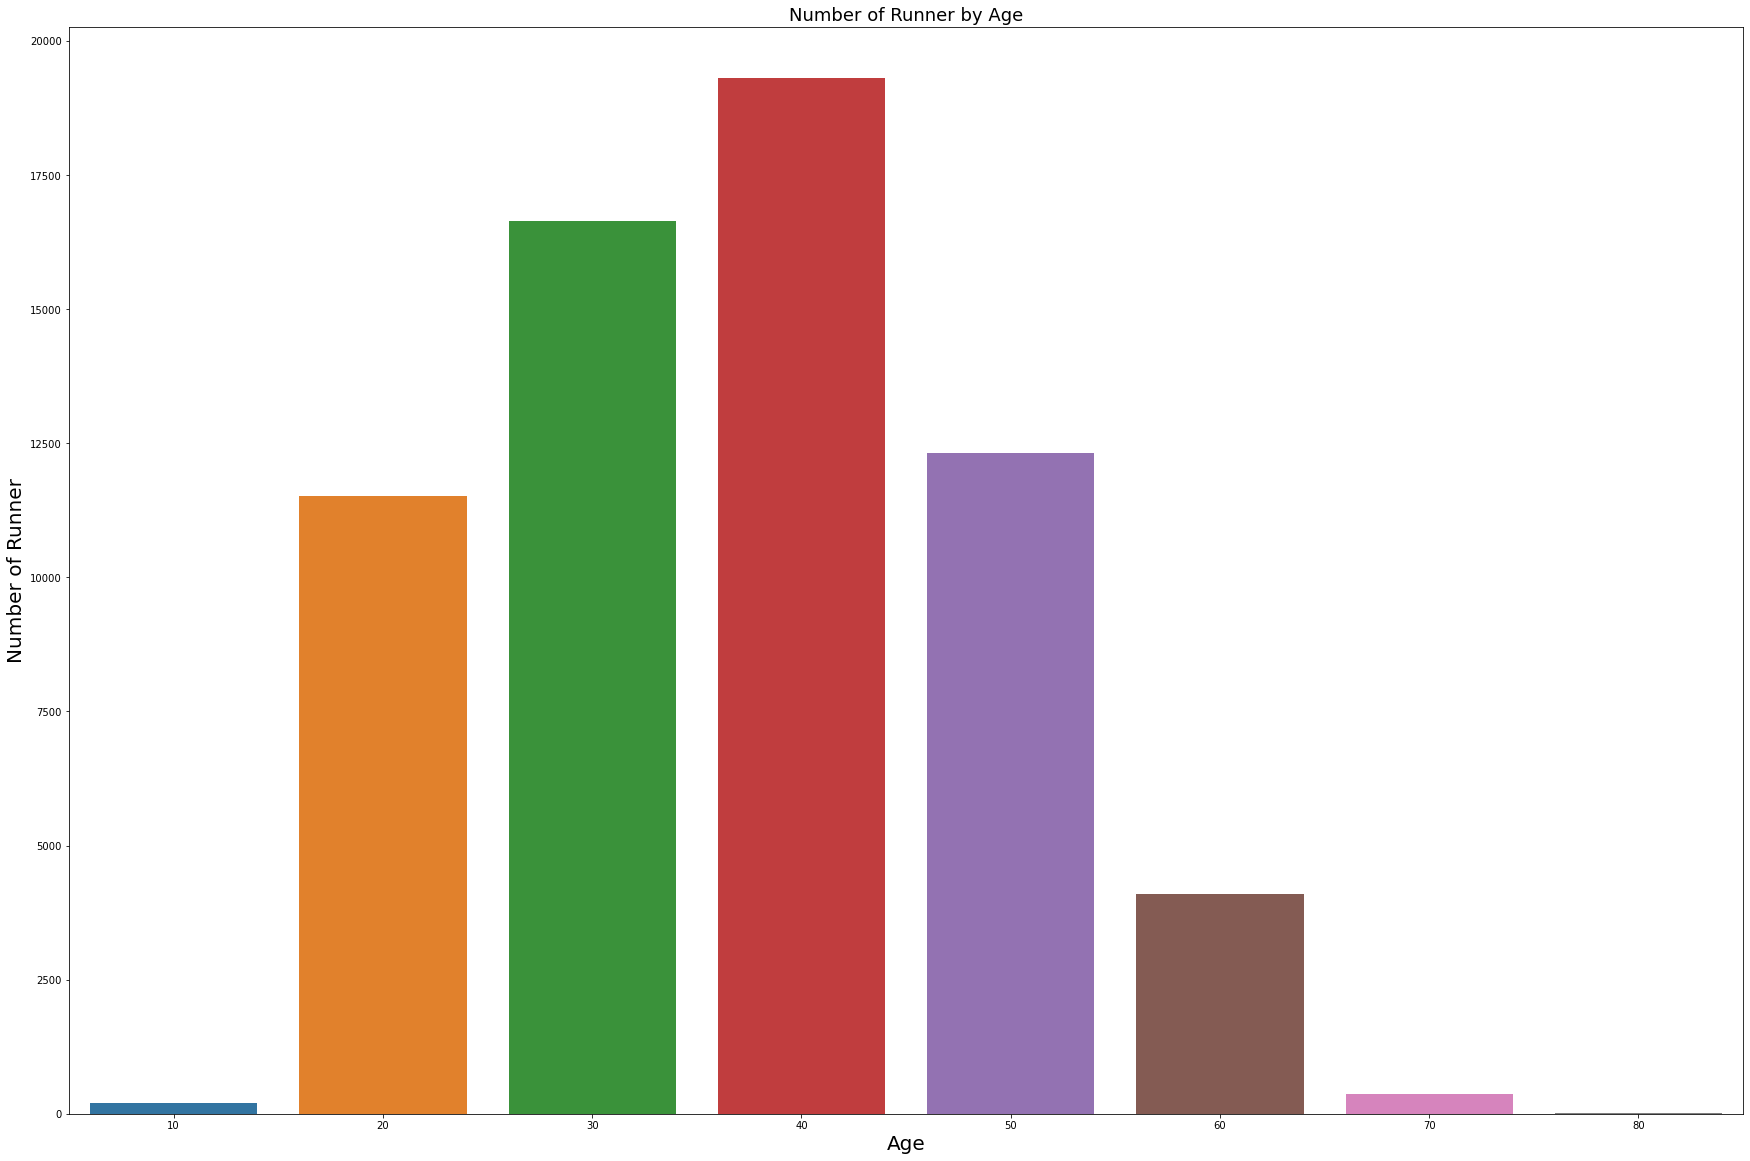

In [13]:
USA_runner['Age10'] = USA_runner['Age']//10  * 10
plt.figure(figsize=(30, 20))
runner_Age = sns.countplot(x='Age10', data = USA_runner)
runner_Age.set_title("Number of Runner by Age", fontsize=18)
runner_Age.set_xlabel("Age", fontdict={'size':20} )
runner_Age.set_ylabel("Number of Runner", fontdict={'size':20} )
plt.show()

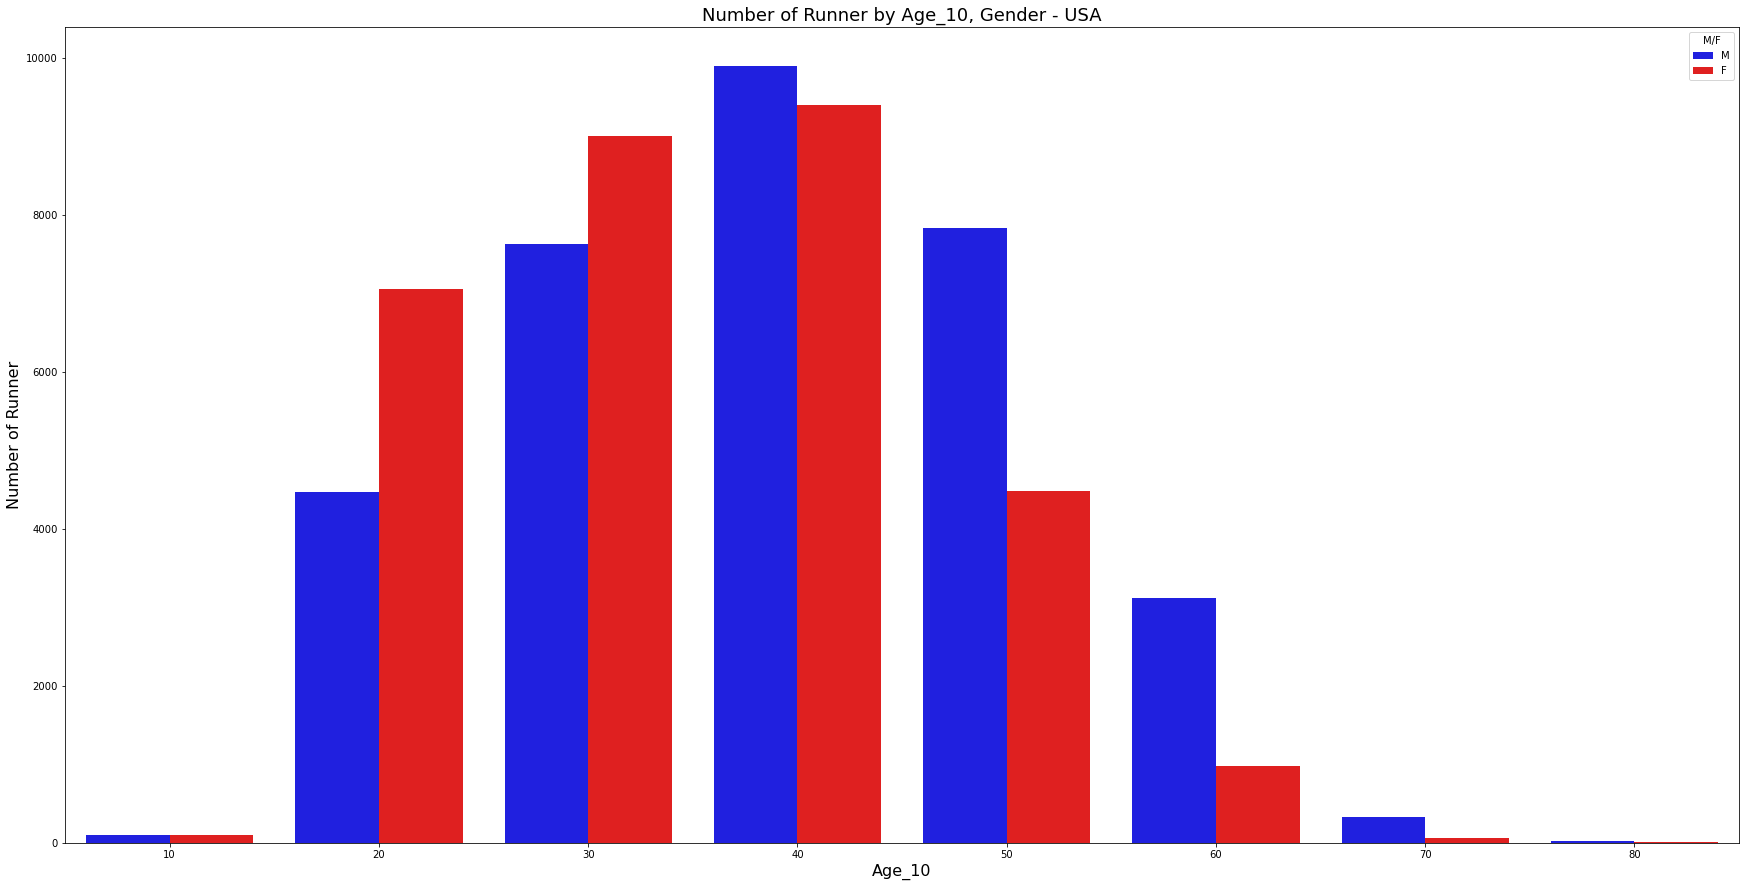

In [14]:
# 각 연령 대별, 남녀 인원수
plt.figure(figsize=(30,15))
runner_state = sns.countplot(x='Age_10', data=USA_runner, \
                                 hue='M/F',  palette={'F':'r','M':'b'})
runner_state.set_title('Number of Runner by Age_10, Gender - USA', fontsize=18)
runner_state.set_xlabel('Age_10', fontdict= {'size':16})
runner_state.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()

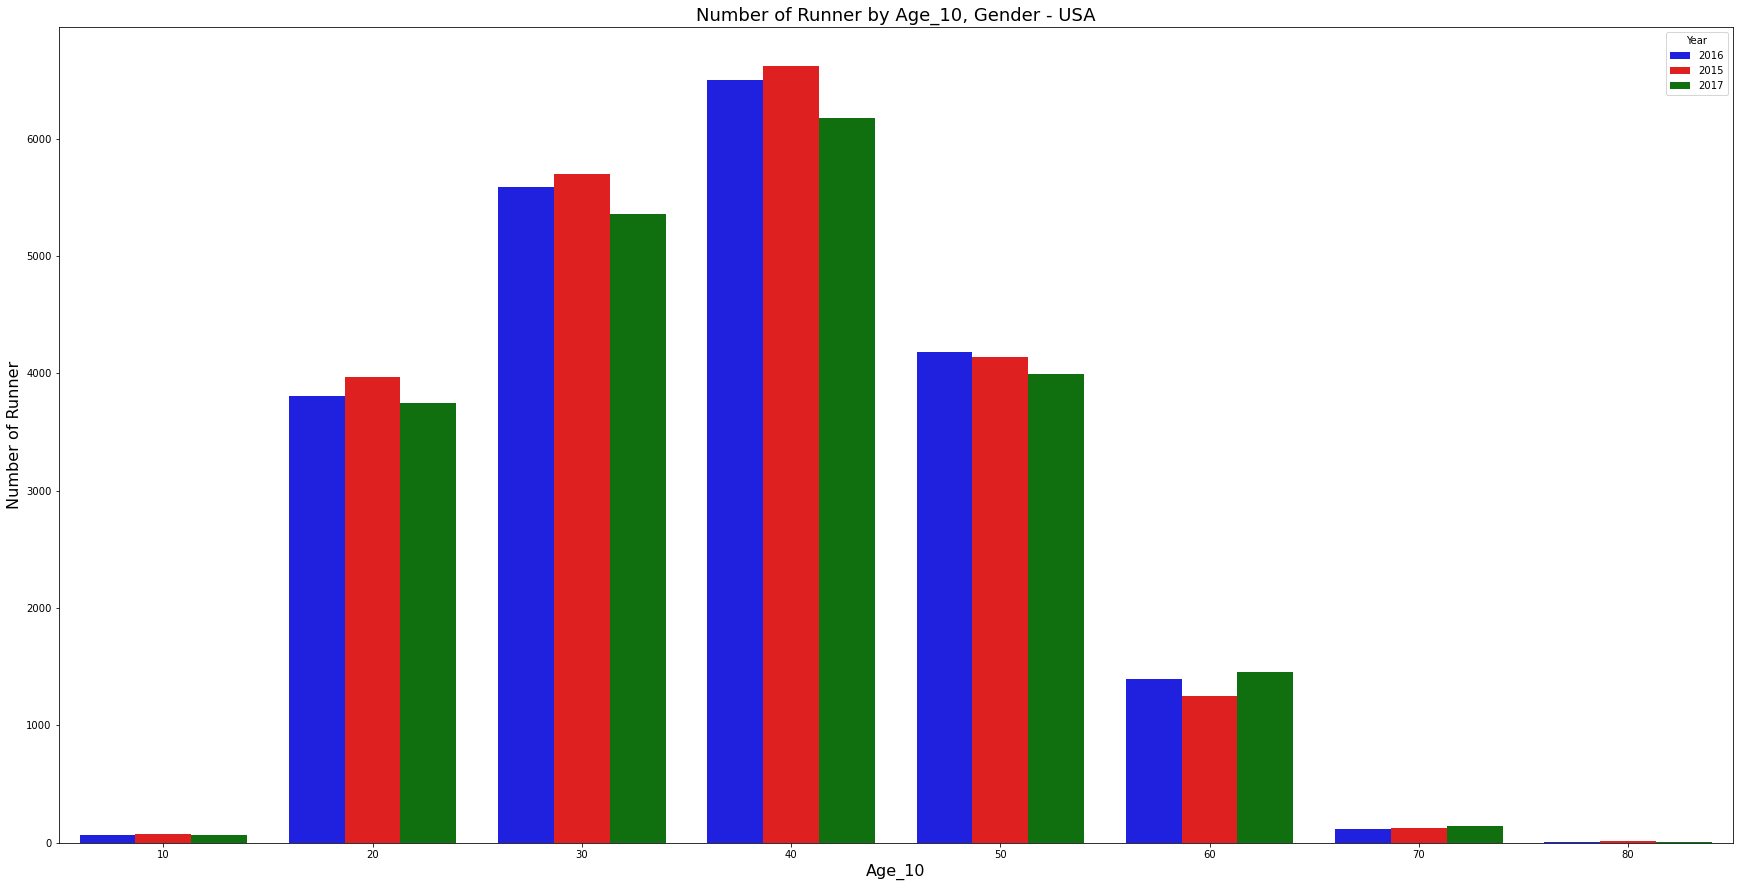

In [21]:
# 연도별 - 연령대별 참가자 인월수 차트 표시
plt.figure(figsize=(30,15))
runner_state = sns.countplot(x='Age_10', data=USA_runner, \
                  hue='Year', palette={ 2017:'g', 2015:'r', 2016:'b'} ,
                  hue_order=[2016,2015,2017])
runner_state.set_title('Number of Runner by Age_10, Gender - USA', fontsize=18)
runner_state.set_xlabel('Age_10', fontdict= {'size':16})
runner_state.set_ylabel('Number of Runner', fontdict= {'size':16})
plt.show()

<BarContainer object of 8 artists>

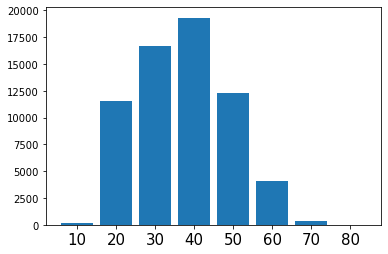

In [17]:
import numpy as np
tg = USA_runner.groupby('Age_10')['Name'].count()
label = ['10','20','30','40','50','60','70','80']
index = np.arange(len(label))
plt.xticks(index, label, fontsize=15)
plt.bar(index, tg)